In [1]:
!pip install neograd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import neograd as ng
import numpy as np
from neograd.nn.loss import BCE
from neograd.nn.optim import GD
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [3]:
X, y = make_circles(n_samples=1000, noise=0.05, random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X,y)

X_train, X_test = ng.tensor(X_train.T), ng.tensor(X_test.T)
y_train, y_test = ng.tensor(y_train.T.reshape(1,750)), ng.tensor(y_test.T.reshape(1,250))

In [4]:
class NN(ng.nn.Model):
  def __init__(self):
    super().__init__(self)
    self.stack = ng.nn.Sequential(
      ng.nn.Linear(2,100),
      ng.nn.ReLU(),
      ng.nn.Linear(100,1),
      ng.nn.Sigmoid()
    )
  
  def forward(self, inputs):
    return self.stack(inputs)

In [5]:
model = NN()
loss_fn = BCE()
optim = GD(model.get_params(), 0.15)

In [6]:
num_iter = 1000

In [7]:
losses = []

for iter in range(num_iter):
  optim.zero_grad()
  outputs = model(X_train)
  loss = loss_fn(outputs, y_train)
  losses.append(loss.data)
  loss.backward()
  optim.step()
  if iter%50==0:
    print(f"iter {iter+1}/{num_iter}\nloss: {loss}\n")

iter 1/1000
loss: Tensor( 5.896141929962739,
 requires_grad=True,
 grad_fn=None,
 shape=() )


iter 51/1000
loss: Tensor( 4.885552326445531,
 requires_grad=True,
 grad_fn=None,
 shape=() )


iter 101/1000
loss: Tensor( 5.531412747104856,
 requires_grad=True,
 grad_fn=None,
 shape=() )


iter 151/1000
loss: Tensor( 3.2629299253110973,
 requires_grad=True,
 grad_fn=None,
 shape=() )


iter 201/1000
loss: Tensor( 2.754733436786742,
 requires_grad=True,
 grad_fn=None,
 shape=() )


iter 251/1000
loss: Tensor( 2.477047490037707,
 requires_grad=True,
 grad_fn=None,
 shape=() )


iter 301/1000
loss: Tensor( 1.7645760434217208,
 requires_grad=True,
 grad_fn=None,
 shape=() )


iter 351/1000
loss: Tensor( 1.1826304766787337,
 requires_grad=True,
 grad_fn=None,
 shape=() )


iter 401/1000
loss: Tensor( 0.5691659785623391,
 requires_grad=True,
 grad_fn=None,
 shape=() )


iter 451/1000
loss: Tensor( 0.533763362424397,
 requires_grad=True,
 grad_fn=None,
 shape=() )


iter 501/1000
loss: Tensor( 0

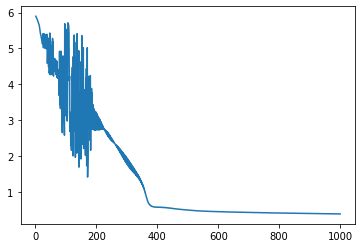

In [8]:
plt.plot(np.arange(1, num_iter+1, 1), losses)

Lots of oscillation in loss curve, need to add momentum to neograd asap :)

In [9]:
with ng.NewGraph():
  test_outputs = model(X_test)
  preds = np.where(test_outputs.data>=0.5, 1, 0)

In [10]:
classification_report(y_test.data.astype(int).flatten(), preds.flatten())

'              precision    recall  f1-score   support\n\n           0       0.97      0.96      0.96       124\n           1       0.96      0.97      0.96       126\n\n    accuracy                           0.96       250\n   macro avg       0.96      0.96      0.96       250\nweighted avg       0.96      0.96      0.96       250\n'

In [11]:
accuracy_score(y_test.data.astype(int).flatten(), preds.flatten())

0.964